In [ ]:
import os
os.chdir('..')

In [97]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import os

import numpy as np 
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import torch
import seaborn as sns
from sklearn.decomposition import PCA

plt.matplotlib.style.use("https://gist.githubusercontent.com/JonnyCBB/c464d302fefce4722fe6cf5f461114ea/raw/64a78942d3f7b4b5054902f2cee84213eaff872f/matplotlibrc")
cool_colors = ['#00BEFF', '#D4CA3A', '#FF6DAE', '#67E1B5', '#EBACFA', '#9E9E9E', '#F1988E', '#5DB15A', '#E28544', '#52B8AA']
cool_colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

plt.rcParams.update({'font.size': 14})

search_to_color = {'BO': cool_colors[0], 'random': cool_colors[1], 'evolutionary': cool_colors[2], 'RF': cool_colors[3], 'RF (div)': cool_colors[5]}

def plot_exploration_evolution(BOresults, df_total, nb_iteration=100,axs=None,color=search_to_color['BO']):
    def y_max(res, rank=False,nb_iterations=100):
        y_max_mu      = -10*np.ones(nb_iterations)
        y_max_sig_bot = -10*np.ones(nb_iterations)
        y_max_sig_top = -10*np.ones(nb_iterations)
        nb_runs = len(res)
        for i in range(1, nb_iterations+1):
            # max value acquired up to this point

            y_maxes = np.array([np.max(BOresults[r]['fitness_acquired'][:i]) for r in range(nb_runs)]) # among runs
            assert np.size(y_maxes) == nb_runs
            y_max_mu[i-1]      = np.mean(y_maxes)
            y_max_sig_bot[i-1] = np.std(y_maxes[y_maxes < y_max_mu[i-1]])
            y_max_sig_top[i-1] = np.std(y_maxes[y_maxes > y_max_mu[i-1]])
        return y_max_mu, y_max_sig_bot, y_max_sig_top
    nb_iterations_range = np.arange(nb_iteration) + 1
    y_max_mu_BO, y_max_sig_bot_BO, y_max_sig_top_BO = y_max(BOresults,nb_iterations= nb_iteration)

    axs[0].plot(nb_iterations_range, y_max_mu_BO, label='10 initial oligomer', color=color)
    axs[0].fill_between(nb_iterations_range, y_max_mu_BO  - y_max_sig_bot_BO, 
                                            y_max_mu_BO + y_max_sig_top_BO, # 
                        alpha=0.2, ec="None", color=color)
    axs[0].set_xlabel('# evaluated oligomers')
    axs[0].set_ylabel('maximum fitness acquired')
    axs[0].set_ylim([-10,0])

    axs[0].axhline(y=np.max(df_total['target'].values), color="k", linestyle="--", label="$\max$ $y_i$", zorder=0)

    df_total['target'].hist(ax=axs[1], bins=20, orientation="horizontal", color=search_to_color['BO'])
    axs[1].set_ylim([-10,-0])
    axs[1].set_xscale('log')
    axs[1].set_xlim([0.9,1e4])


In [65]:
import pandas as pd
from stk_search import Database_utils
import importlib
importlib.reload(Database_utils)
#%% 
# Load the searched space
df_path = 'data/output/Full_datatset/df_total_new2023_08_20.csv'
df_precursors_path = 'data/output/Prescursor_data/calculation_data_precursor_190923_clean.pkl'#'Data/output/Prescursor_data/calculation_data_precursor_310823_clean.pkl'
df_total, df_precursors = Database_utils.load_data_from_file(df_path, df_precursors_path)


C:\Users\ma11115\OneDrive - Imperial College London\github_folder\STK_search\src\stk_search\Database_utils.py:106: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv(df_path)


In [111]:
import glob
import pickle
files = glob.glob('data/output/search_experiment/test/random/*/*.pkl')
BOresults_random = []
for file in files:
    with open(file, 'rb') as f:
        BOresults_random.append(pickle.load(f))
    #print(max(BOresults[-1]['ids_acquired']))

In [105]:
file

'data/output/search_experiment/test/evolution_algorithm\\20231003\\results_20231003_144439.pkl'

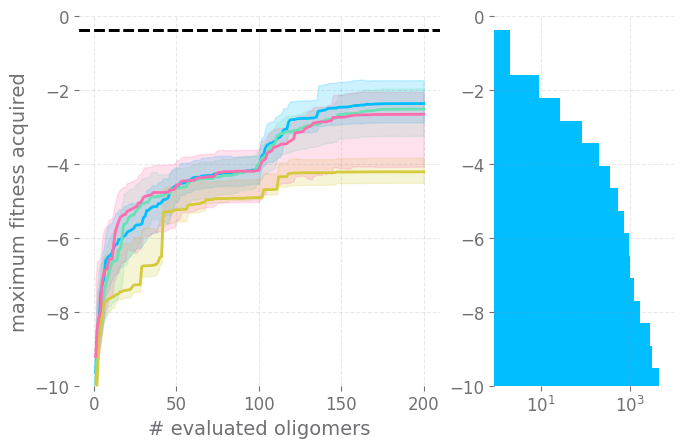

In [112]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 2]}, figsize=[1.2 * 6.4, 4.8])#, sharey=True)

plot_exploration_evolution(BOresults_precursor, df_total, nb_iteration=200,axs=axs,color=search_to_color['BO'])
plot_exploration_evolution(BOresults_slatm, df_total, nb_iteration=200,axs=axs,color=search_to_color['RF'])
plot_exploration_evolution(BOresults_random, df_total, nb_iteration=200,axs=axs,color=search_to_color['random'])
plot_exploration_evolution(BOresults_EA, df_total, nb_iteration=200,axs=axs,color=search_to_color['evolutionary'])


In [77]:
toz=-100
for x in BOresults:
    toz=max(toz,max(x['fitness_acquired']))


In [78]:
toz

-0.8692999999999997

In [101]:
x = 1
x is not None

True